In [9]:
import numpy as np
import pandas as pd

In [10]:
df_feature = pd.read_csv('../data/raw/application_record.csv',header=0)
df_feature

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [11]:
df_feature.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [12]:
pd.DataFrame(df_feature.isnull().any()).style.set_caption('<h3> Missing Values').hide(axis=1)

ID,False
CODE_GENDER,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
NAME_INCOME_TYPE,False
NAME_EDUCATION_TYPE,False
NAME_FAMILY_STATUS,False
NAME_HOUSING_TYPE,False
DAYS_BIRTH,False


In [13]:
df_feature['OCCUPATION_TYPE'] = df_feature['OCCUPATION_TYPE'].fillna('Not reported')

In [14]:
pd.DataFrame(df_feature.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()).style.set_caption('<h3> Occupation Type').hide(axis=1)

OCCUPATION_TYPE,
Accountants,15985
Cleaning staff,5845
Cooking staff,8076
Core staff,43007
Drivers,26090
HR staff,774
High skill tech staff,17289
IT staff,604
Laborers,78240
Low-skill Laborers,2140


In [15]:
df_feature_drop = df_feature.drop(['CODE_GENDER','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_EMAIL'],axis=1)
df_feature_drop.isnull().any()

ID                     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
FLAG_PHONE             False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [16]:
df_feature_clean = df_feature_drop
df_feature_clean.dtypes

ID                       int64
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_PHONE               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [17]:
for col in df_feature_clean.columns:
    if df_feature_clean[col].dtype == 'object':
        df_feature_clean[col] = pd.factorize(df_feature_clean[col])[0]

df_feature_clean.dtypes

ID                       int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
FLAG_PHONE               int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [18]:
feature_id = df_feature_clean['ID'].values
df_feature_clean = df_feature_clean.drop(['ID'],axis=1)

In [19]:
feature_id

array([5008804, 5008805, 5008806, ..., 6841878, 6842765, 6842885])

In [20]:
df_label = pd.read_csv('../data/raw/credit_record.csv',header=0)
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [21]:
df_label.groupby('ID')['STATUS'].count()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: STATUS, Length: 45985, dtype: int64

In [22]:
df_label['STATUS'], labels = pd.factorize(df_label['STATUS'])
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [23]:
labels

Index(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype='object')

```
- index 0 = X: No loan for the month
- index 1 = 0: 1-29 days past due
- index 2 = C: paid off that month
- index 3 = 1: 30-59 days past due
- index 4 = 2: 60-89 days overdue
- index 5 = 3: 90-119 days overdue
- index 6 = 4: 120-149 days overdue
- index7 = 5: Overdue or bad debts, write-offs for more than 150 days
```

In [24]:
df_label_clean_records = df_label[df_label['STATUS'] != 0]
df_label_clean_records

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
5,5001712,-1,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [25]:
df_label_clean_records['STATUS'][df_label_clean_records['STATUS']>5] = 10
df_label_clean_records['STATUS'][df_label_clean_records['STATUS']<=5] = 0
df_label_clean_records

/tmp/ipykernel_807567/2169239545.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_label_clean_records['STATUS'][df_label_clean_records['STATUS']>5] = 10
/tmp/ipykernel_807567/2169239545.py:1: SettingWithCopyWarning: 
A value is trying 

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
5,5001712,-1,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [26]:
df_label_clean_records.groupby('STATUS')['STATUS'].count()

STATUS
0     837429
10      1916
Name: STATUS, dtype: int64

In [27]:
df_label_clean = df_label_clean_records.groupby('ID').mean()
df_label_clean

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,0.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [28]:
df_label_clean['STATUS'][df_label_clean['STATUS'] > 0 ] = 1
df_label_clean['STATUS'][df_label_clean['STATUS'] <= 0 ] = 0
df_label_clean

/tmp/ipykernel_807567/2899996790.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_label_clean['STATUS'][df_label_clean['STATUS'] > 0 ] = 1
/tmp/ipykernel_807567/2899996790.py:2: FutureWarning: ChainedAssignmentError: behaviour will cha

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,0.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [29]:
df_label_clean.groupby('ID')['STATUS'].count()

ID
5001711    1
5001712    1
5001717    1
5001718    1
5001719    1
          ..
5150480    1
5150482    1
5150484    1
5150485    1
5150487    1
Name: STATUS, Length: 41449, dtype: int64

In [30]:
df_label_clean.groupby('STATUS')['STATUS'].count()


STATUS
0.0    41206
1.0      243
Name: STATUS, dtype: int64

In [31]:
label_id = df_label_clean.index.values 
label_status = df_label_clean['STATUS'].values 

In [32]:
ID = [ item for item in feature_id if item in label_id] 

In [33]:
features = df_feature_clean.values
X_list = [ features[np.where(feature_id == item), :][0] for item in ID ] 
X = np.vstack(X_list) 
X.shape

(33110, 11)

In [34]:
y = np.array([ label_status[np.where(label_id == item)][0] for item in ID ])
y.shape

(33110,)

In [35]:
sum(y==0)


32884

In [36]:
sum(y==1)


226

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [38]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1) #resample of imbalanced label
X_res, y_res = undersample.fit_resample(X_train, y_train)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res,test_size=0.2,random_state=0)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16, 32, 64, 128]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 51.1264367816092


In [42]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 45.69616430081546


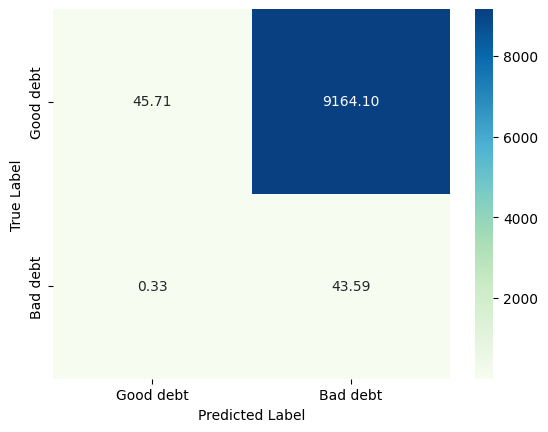

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Good debt', 'Bad debt']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(float).sum(axis=1)*100
sns.heatmap(C,annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

   Good debt       0.99      0.46      0.63      6583
    Bad debt       0.00      0.44      0.01        39

    accuracy                           0.46      6622
   macro avg       0.50      0.45      0.32      6622
weighted avg       0.99      0.46      0.62      6622



In [45]:
import tensorflow as tf
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(8, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')  
    ])
    return model

2024-08-07 20:44:13.068057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 20:44:13.080866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 20:44:13.084850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 20:44:13.095849: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 20:44:14.277364: W tensorflow/compiler/tf2

In [46]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

/x/1_projects/dsi/python/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1723077855.607131  807567 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723077855.655495  807567 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723077855.661315  807567 cuda_executo

In [47]:
train_acc = list()
val_acc = list()
for i in range(0,300):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 300, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

I0000 00:00:1723077857.362180  808026 service.cc:146] XLA service 0x7eff8800d0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723077857.362219  808026 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-08-07 20:44:17.397006: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-07 20:44:17.601085: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4682 - loss: 0.7000

I0000 00:00:1723077859.290205  808026 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4682 - loss: 0.7000 - val_accuracy: 0.5067 - val_loss: 0.6927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4582 - loss: 0.6995 - val_accuracy: 0.5200 - val_loss: 0.6927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4649 - loss: 0.6991 - val_accuracy: 0.5333 - val_loss: 0.6926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4682 - loss: 0.6987 - val_accuracy: 0.5200 - val_loss: 0.6925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4682 - loss: 0.6983 - val_accuracy: 0.5200 - val_loss: 0.6925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4615 - loss: 0.6979 - val_accuracy: 0.5200 - val_loss: 0.6924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4682 - loss: 0.6976 - val_accuracy: 0.5200 - val_loss: 0.6924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4749 - loss: 0.6972 - val_accuracy: 0.5467 - val_loss: 0.6924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4783 - loss: 0.6969 - val_accuracy: 0

In [48]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.6150709755360918

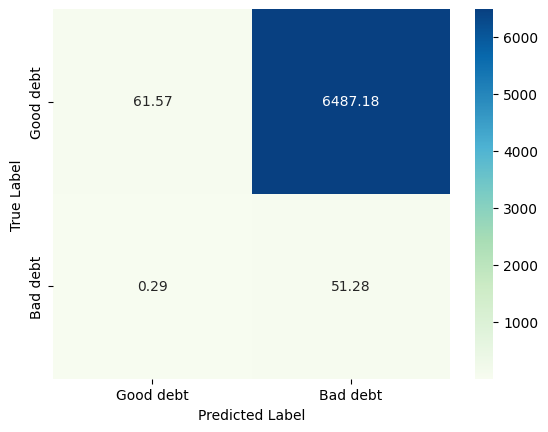

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Good debt', 'Bad debt']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

   Good debt       1.00      0.62      0.76      6583
    Bad debt       0.01      0.51      0.02        39

    accuracy                           0.62      6622
   macro avg       0.50      0.56      0.39      6622
weighted avg       0.99      0.62      0.76      6622

